In this lab, you will make character-based n-gram models from large samples of text and will check how their predictions compare to those of your (human) classmates on the "sequential hangman" task of Shannon (1951). This is broken down into the following tasks:

- Required: count the words in the corpus and put them in the appropriate data structure  
- Required: compute conditional probability  
- Optional: compute # of guesses per position in hangman task  
- Provided: compare # of model with # of human guesses  
- Optional: compute the probability of a new text file  
- Optional: draw strings of a given length from the model  
- Optional: implement add-one smoothing  

For the “Optional” and “Provided” steps, I have made functions you can use. If you finish the required steps, try implementing your own version of some of the functions provided, especially `getNumberOfGuesses`, `computeProbTestSet` and `generateString`. For all of these functions, I have provided a selection of tests to evaluate whether your implementation produces the same output as mine.

First, we load the required libraries for the lab:

In [89]:
%matplotlib inline
import pdb # for debugging
import numpy as np # for vector operations and math
import pandas as pd # for prepping to graph
import ggplot # for graphing
import json  # to read the experiment results

Your first task is to populate a variable called `ngram` with the counts of character sequences observed in a text file.

- `ngram` is a dictionary, keys indicate order of the model. For example, `ngram[2]` contains bigram counts, `ngram[3]` contains trigram counts, etc. `ngram[0]` is a special case with the total count of characters  
- `ngram[i]` is a dictionary, where keys are character sequences of length $i$
- Following the above two constraints, the count for a 3-character sequence like 'plo' would be stored as `ngram[3][‘plo’]`
- To populate each order of the model, iterate through the lines of the file, find all sequences of length $n$, and increment the appropriate counts  
- To make this easier, I've provided the `subsequences(input_list, n)` function, which returns all consecutive sequences of length `n` in `input_list` as an ordered list of tuples
 


In [90]:
def subsequences(input_list, n):
    '''return all consecutive tuples of length n in input_list'''
    return(list(zip(*(input_list[i:] for i in range(n)))))

# example uses of subsequences on some numeric lists
print(subsequences(range(9),1))
print(subsequences(range(9),2))

[(0,), (1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,)]
[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8)]


We start by initializing the `ngram` variable as a dictionary, where keys 1-3 correspond are embedded dictionaries. Key 0 is an integer, which will be the total number of words in the dataset.

In [125]:
# initialize storage for the model
ngram = {}
for i in range(1,4):
    ngram[i] = {}
ngram[0] = 0    
ngram    

{0: 0, 1: {}, 2: {}, 3: {}}

Then we open the training data and iterate through the letters in each line. The line is converted to lowercase.

In [92]:
with open('en_train_ascii.txt','r') as f:
    for x in f:
        characters = [x.lower() for x in list(x.replace('\n',''))]        
        
        # Your code here: populate the counts of `ngram` with the transitions
        # seen in the characters in en_train_ascii.txt
        
        # GOAL: construct `ngram` as a hierarchical dictionary
        # order of model -> character sequence -> count of character sequence
        # The following steps may help guide you:
        # iterate over lines in the file 
            # iterate over all values of `n` (order of the model)
                # find all subsequences of length `n`
                    # if that subsequence doesn't exist yet, create a record
                    # with count 1
                    # else if it already exists, increment the count by 1
        # See Solution 1 (7 lines)
 

Test whether you have properly populated the counts in `ngram` by running the tests below. You will see an error if your counts diverge from my implementation. 

In [93]:
np.testing.assert_allclose(ngram[3]['str'], 2295)
np.testing.assert_allclose(ngram[2]['st'], 34041)
np.testing.assert_allclose(ngram[0], 5747649)

The `ngram` data structure allows us to (relatively) quickly retrieve the counts that we need to compute the conditional probabilities of character sequences. For example, to compute the conditional probability of 'r' given a preceding 'st', we can take the count of the sequence 'str' and divide by the count of the sequence 'st' (corresponding to the count of 'st\*' where \* is any character)

In [94]:
print(float(ngram[3]['str']) / ngram[2]['st'])

0.06741870097823213


Variants of the code above will allow you to compute the conditional probability of any sequence, using the counts that we collected from the training text file. Write a function that will generalize the computation of the conditional probability of some character given a (possibly empty) preceding context. If the context is empty, the function should return the unigram count of the character divided by the total numer of characters in the dataset, which you should have stored previously as `ngram[0]`

In [95]:
def getProbability(character, context, ngram):
    '''get the conditional probability of the character given the context'''
    
    # Your code here: return the conditional probability of `character` given
    # the preceding characters in `context`, using the counts stored in `ngram`
    # if context is null, return the probability of the character
    
    # The following steps may help guide you:
    # if we wanted to get the probability of 'r' given 'st'
    # get the count of the context + character (# of instances of "str")
    # get the count of context (# of instances of "st")
    # note: remember to cast one of the integers as a float so that you aren't
    # doing integer division
        
    #See Solution 2 (8 lines)   

Test whether you are properly computing conditional probabilities using the tests below. Again, you will see an error if your counts diverge from my implementation. Why did I pick 'qu' and 'qa' as test cases?

In [96]:
np.testing.assert_allclose(getProbability('q',[], ngram), .000461580030374)
np.testing.assert_allclose(getProbability('u',['q'], ngram), .975499434602)
np.testing.assert_allclose(getProbability('a',['q'], ngram), .00226159065209)

Now that we can get the probability of each transition, we can use our unigram, bigram, and trigram language models to play the sequential hangman game

# Sequential Hangman

Here is the sentence (`sh_chars`) and corresponding counts (`sh_counts`) from the Shannon (1951) paper:

In [97]:
sh_chars = list('there is no reverse on a motorcycle')
sh_counts = [1,1,1,5,1,1,2,1,1,2,1,1,15,1,17,1,1,1,2,1,3,2,1,2,2,7,1,1,1,1,4,1,1,1,1]

We can plot the number of guesses (y-axis) against the position in the sentence on the x-axis to see where it took people fewer or more guesses to correctlty predict the next letter. Why do you think that R and V in reverse took so many guesses? Why was the beginning of the sentence so easy?

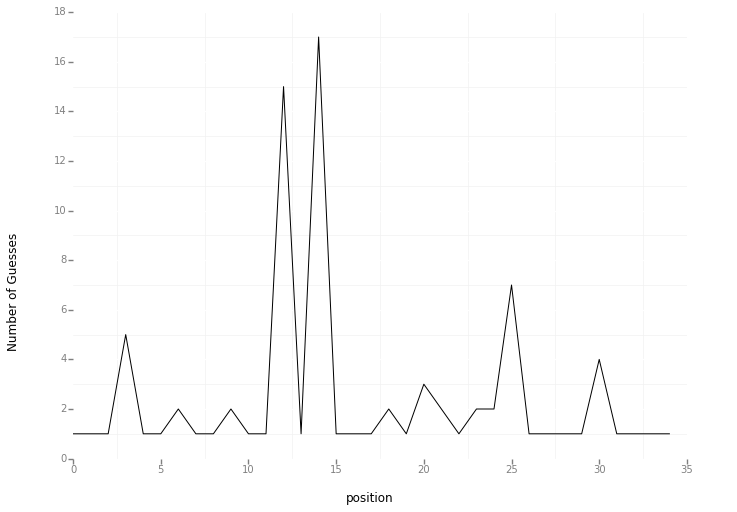

<ggplot: (8751537433520)>

In [99]:
df = pd.DataFrame({'char':sh_chars,'count':sh_counts, 'position':range(len(sh_chars))})
ggplot.ggplot(df, ggplot.aes(x='position', y='count')) + ggplot.geom_line(color='black') + ggplot.theme_bw() +\
ggplot.ylab('Number of Guesses') 
#!!! x-axis labeling and geom_text are both broken in the python version of ggplot

How many guesses does each ngram model take? Write a function that guesses character-by-character using up to the specified number of preevious characters. For example, if the specified order is 3, the first guess it should make should be made using the unigram character probabilities; the second with the bigram probabilities, and each thereafter with the trigram probabilities. In each case, try each possible continuation in descending order of their probability. Return a list of the number of counts so that we can compare it with the human data.

How does this compare with the number of guesses of a monkeys-on-typewriters model, where all characters are equally likely?

In [100]:
def getGuessCount(sh_chars, ngram, order):
    # Your code here: return an array with the number of guesses required 
    # to guess each character in `sh_chars`, guessing each letter following
    # the descending probability of continuations. Probability of continuations
    # should be computed from `ngram` using preceding context of up to 
    # `order`-1 characters    
    
    # If you are stuck, the following steps might be useful: 
    # iterate over characters
        # for each character, find the proceding context, up to order minus one
            # get the set of possible continuations
            # get the probability of each continuation (using getProbability)
            # sort the guesses by probability
            # find the index of the correct guess
    
    # See Solution 3 (18 lines)        

In [101]:
print(getGuessCount(sh_chars, ngram, 3))
print(getGuessCount(sh_chars, ngram, 2))    
print(getGuessCount(sh_chars, ngram, 1))

[3, 2, 1, 2, 2, 1, 3, 1, 1, 7, 1, 3, 19, 1, 13, 1, 2, 3, 3, 1, 6, 2, 1, 2, 1, 5, 4, 3, 8, 2, 15, 7, 2, 2, 1]
[3, 2, 1, 2, 1, 1, 3, 2, 1, 13, 2, 2, 18, 1, 11, 1, 2, 6, 3, 1, 9, 3, 1, 2, 4, 7, 4, 5, 3, 4, 17, 13, 15, 9, 3]
[3, 9, 2, 10, 2, 1, 6, 8, 1, 7, 4, 1, 10, 2, 23, 2, 10, 8, 2, 1, 4, 7, 1, 5, 1, 15, 4, 3, 4, 10, 18, 14, 18, 11, 2]


Now we add the counts to the plot

In [102]:
df['unigram'] = getGuessCount(sh_chars, ngram, 1)
df['bigram'] = getGuessCount(sh_chars, ngram, 2)
df['trigram'] = getGuessCount(sh_chars, ngram, 3)

We can plot the results of the model against the number of guesses by a person in Shannon (1951)

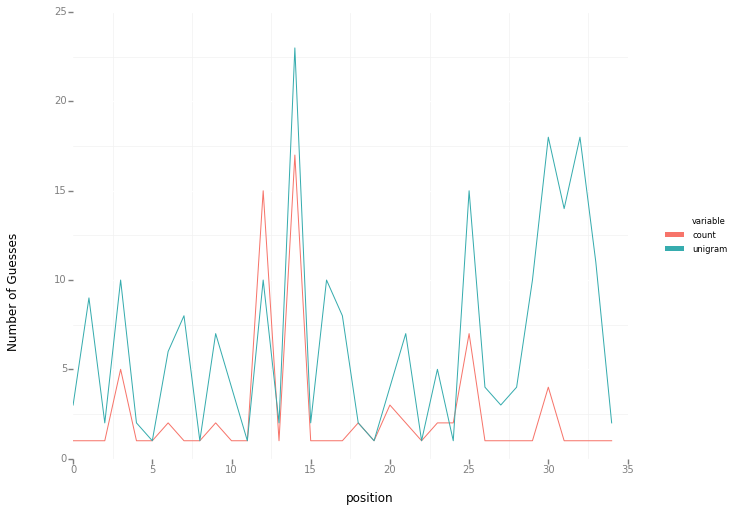

<ggplot: (8751535537181)>


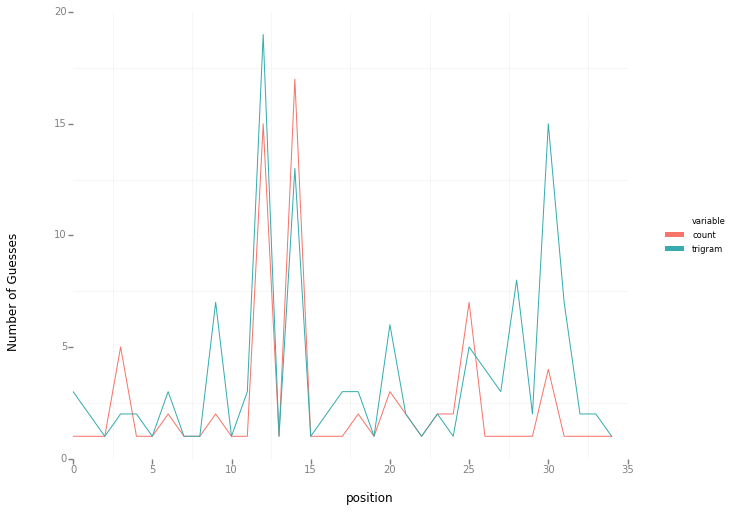

<ggplot: (-9223363285319278143)>


In [103]:
mdf = pd.melt(df, id_vars=['position'], value_vars=['count','unigram','bigram','trigram'])

print(ggplot.ggplot(mdf[mdf.variable.isin(['unigram','count'])], ggplot.aes(x='position', y='value', colour='variable')) +\
ggplot.geom_line() + ggplot.theme_bw() + ggplot.ylab('Number of Guesses'))

print(ggplot.ggplot(mdf[mdf.variable.isin(['trigram','count'])], ggplot.aes(x='position', y='value', colour='variable')) +\
ggplot.geom_line() + ggplot.theme_bw() + ggplot.ylab('Number of Guesses'))


We can also evaluate the quality of the models in terms of their root mean squared error, a single summary statistic of how many guesses each model had to make at each position compared to humans. Implement the equation (you can find it on Wikipedia or many other places) in Python. If possible, do it with vector-based operations in Numpy.  

In [104]:
def rmse(array1, array2):
    # Your code: compute the root mean square error between the model 
    # predictions and the number of guesses required by people. This should
    # return a single float
    # See Solution 5 (1 line)

In [105]:
np.testing.assert_allclose(rmse(df['count'],df['unigram']), 6.1990782725)
np.testing.assert_allclose(rmse(df['count'],df['bigram']), 4.97709037204)
np.testing.assert_allclose(rmse(df['count'],df['trigram']), 3.01898753132)

Now that we have functions to guess the next letter for each sentence we will try it on the set of sentences that we collected from everyone. First we download the a CSV with aggregated results:

In [106]:
import urllib
import urllib.request
fpath = 'http://cocosci.berkeley.edu/smeylan/agg.csv'
spath = 'http://cocosci.berkeley.edu/smeylan/sentences.csv'
urllib.request.urlretrieve(fpath, "web_expt_results.csv")
urllib.request.urlretrieve(spath, "sentences.csv")

('sentences.csv', <http.client.HTTPMessage at 0x7f5a02901588>)

In [107]:
sentences = dict(zip(pd.read_csv('sentences.csv').id, [x.replace('_',' ') for x in pd.read_csv('sentences.csv').sentence]))

In [108]:
web_expt = pd.read_csv('web_expt_results.csv')
web_expt.columns =['trial','position','count']
web_expt.iloc[0:5]

,trial,position,count
0,0,0,1
1,0,1,1
2,0,2,1
3,0,3,3
4,0,4,1


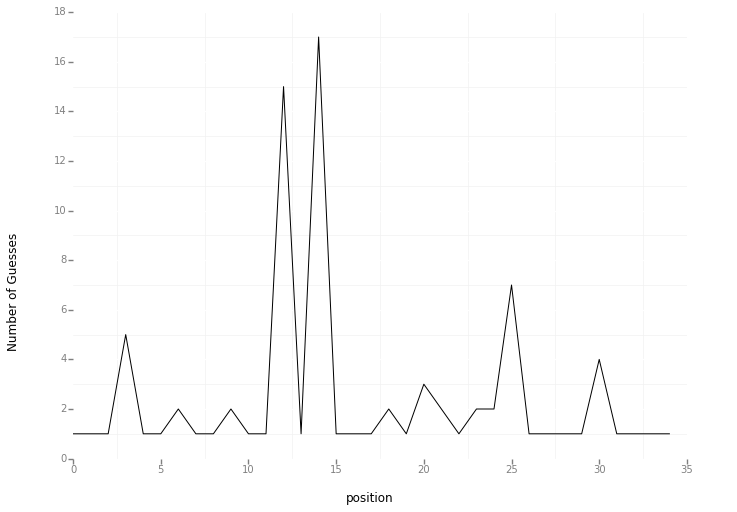

<ggplot: (-9223363285319274236)>

In [109]:
ggplot.ggplot(df, ggplot.aes(x='position', y='count')) + ggplot.geom_line(color='black') + ggplot.theme_bw() +\
ggplot.ylab('Number of Guesses') 

In [110]:
# need the original sentences in each case

In [111]:
def plotModelsForTrial(trial_index):
    # produce a plot with the number of guesses for each character from 
    # web_expt, plus the number of guesses under a unigram, bigram, and
    # trigram model (each in a separate column, under the names unigram,
    # bigram, and trigram). Use guess count 
    
    # first we get the subset of median guesses corresponding to this trial_index
    df = web_expt[web_expt.trial == trial_index]
    # and make sure that this is in sequential order
    df.sort_values(by='position')
    # and retrieve the chacatacter sequence for this sentence
    char_seq = list(sentences[trial_index])
    df['character'] = char_seq
    #df['unigram'] = # your solution here
    #df['bigram'] = # your solution here
    #df['trigram'] = # your solution here
    # See soluition 5
    
    mdf = pd.melt(df, id_vars=['position'], value_vars=['count','unigram','bigram','trigram'])
    print(ggplot.ggplot(mdf, ggplot.aes(x='position', y='value', colour='variable')) +\
    ggplot.geom_line() + ggplot.theme_bw() + ggplot.ylab('Number of Guesses'))
  

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

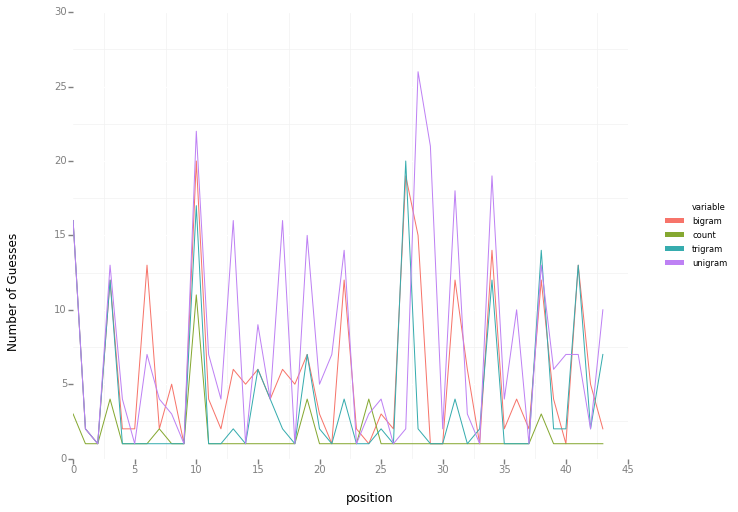

<ggplot: (8751538406320)>


In [112]:
plotModelsForTrial(1)  

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

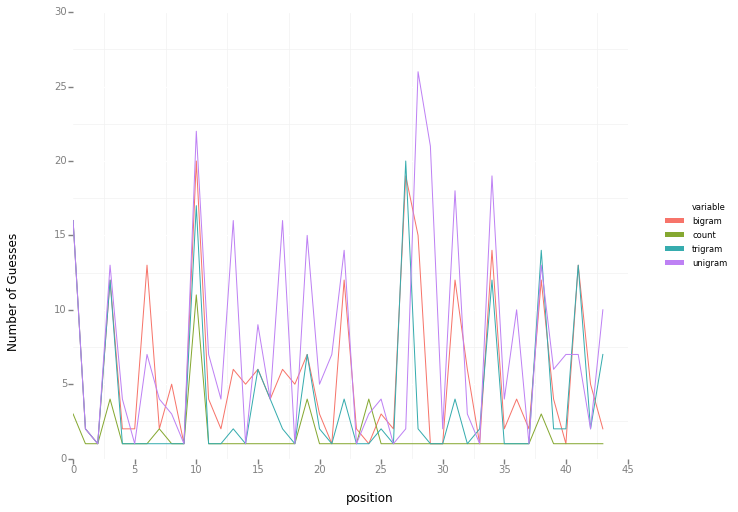

<ggplot: (-9223363285319264347)>


In [113]:
plotModelsForTrial(1)

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

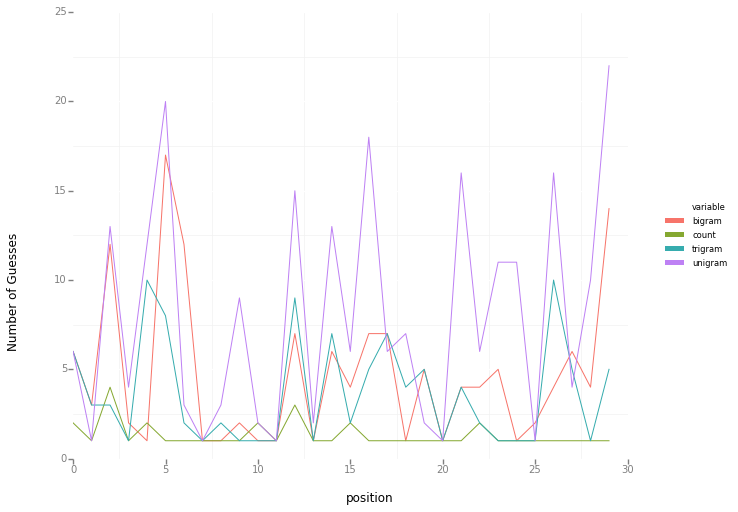

<ggplot: (8751538372630)>


In [114]:
plotModelsForTrial(2)

# Probability of a held-out text

Another thing that we might want to do with the model is evaluate the probability of some text. Though we don't have estimates of how probable people think the continuations are, we can compare the log probability of the text to see if the data is more likely under a higher-order model. 

In [115]:
def computeProbTestSet(filename, order, ngram):
    # Return float indicating the log probability of the 
    # corpus in filename under the model `ngram` using contexts up to length
    # ngram - 1. We use log probability because this number will be very small.
    # The following code initializes a list `prob_store` where you can store
    # the log probability of each sentence

    probs_store = [] 
    with open(filename,'r') as f:
        for x in f: # for each line, as a string in f
            # Your code here!
    
    # If you are stuck, the following steps might be useful: 
    # Iterate over lines in the file:
        # iterate over the characters in each line
        # get the probability of each character given the preceding characters        
        # when you finish a sentence, add it to prob_store
    
    # Also note you may want to review mathematical operations with log-
    # transformed values. What trick can be used to multiply log 
    # probabilities?

    # See Solution 6

In [116]:
np.log((1/float(27)))*2879780 # where 2879780 is the number of characters in the test set 

-9491285.0899819471

In [117]:
computeProbTestSet('en_test_within_ascii.txt',1)

-8025236.98228


In [118]:
computeProbTestSet('en_test_within_ascii.txt',2)

-6364835.02565


In [119]:
computeProbTestSet('en_test_within_ascii.txt',3)

-4885605.8259


Note that this text file is a subsample of the original text file that we used to train the model. If we test on another file, it is very likely that higher-order models that we have built so far will fail. For example, on a test set of a different set of English movies, the unigram model is fine, but the bigram model fails:

In [120]:
computeProbTestSet('en_test_ascii.txt',1)

-7792260.22744


In [121]:
computeProbTestSet('en_test_ascii.txt',2)

KeyError: 'jk'

What is going wrong? What would we need to do to our ngram models so that they could provide us with probability estimates of new texts?

# Generating strings from the models

We might want to generate from the model...

In [ ]:
def generateString(charlength, ngram, order):    
    # Return a string of length `charlength` sampled from the model `ngram`, using up to 
    # `order` - 1 preceding characters. 
    
    # If you are stuck, you may want to consider the following steps:\\
    # Iterate over characters from 0:charlength
        # find the preceding context given your position in the string
        # choose the next character given the preceding context, using np.random.choice 
    
    # See Soluton 7 (20 lines)

In [122]:
generateString(100, ngram, 1)

" ioat   revt tadugyeaetiijhoatbenigrirwknhor mhdet tmedafmhoeauuhoolthatonsiy odge8a pos  o'ss hy rn"

In [123]:
generateString(100, ngram, 2)

"f ise ton yo s to y withmesoug mary 80 is ho isthuno s upeayoherkit r t foulm brel tois n' lee vime "

In [124]:
generateString(100, ngram, 3)

"he the men men trut daillethe coment a com his we ang itherion't a wat if eve thill of you amparry t"